In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta       

Get an idea of what the data we're working with looks like

In [28]:
df = pd.read_csv('ENB2012_data.csv')
df

#note to self :

#input parameters
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution

# outputs
# y1 Heating Load
# y2 Cooling Load




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [42]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

(Rows, Columns) (768, 10)

Check for empty values
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []


/var/folders/b7/bq0h81m57s1g_18vh23zv22r0000gn/T/ipykernel_10999/1635922065.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(df[df.eq("?").any(1)]) #check for missing values


In [31]:
def standardize_data (df):
    df = (df - df.mean())/df.std()
    return df

df = standardize_data(df)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.759300,-1.813393,-0.669680,-0.342443
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.759300,-1.813393,-0.669680,-0.342443
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.759300,-1.813393,-0.669680,-0.342443
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.759300,-1.813393,-0.669680,-0.342443
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.759300,-1.813393,-0.145409,0.388113
...,...,...,...,...,...,...,...,...,...,...
763,-1.173848,1.274794,0.561586,0.971879,-0.999349,1.340767,1.243239,1.410417,-0.438763,-0.335084
764,-1.362924,1.552931,1.123171,0.971879,-0.999349,-1.340767,1.243239,1.410417,-0.571565,-0.810208
765,-1.362924,1.552931,1.123171,0.971879,-0.999349,-0.446922,1.243239,1.410417,-0.581475,-0.786032
766,-1.362924,1.552931,1.123171,0.971879,-0.999349,0.446922,1.243239,1.410417,-0.577511,-0.838590


In [32]:
def df_stats(df):
    print(df.describe())
df_stats(df)

               X1            X2          X3            X4          X5  \
count  768.000000  7.680000e+02  768.000000  7.680000e+02  768.000000   
mean     0.000000 -4.348374e-16    0.000000  1.942890e-16    0.000000   
std      1.000000  1.000000e+00    1.000000  1.000000e+00    1.000000   
min     -1.362924 -1.784712e+00   -1.684757 -1.469119e+00   -0.999349   
25%     -0.772061 -7.416984e-01   -0.561586 -7.910642e-01   -0.999349   
50%     -0.133929  2.317808e-02    0.000000  1.582128e-01    0.000000   
75%      0.622376  7.880546e-01    0.561586  9.718789e-01    0.999349   
max      2.040447  1.552931e+00    2.246342  9.718789e-01    0.999349   

               X6            X7            X8            Y1            Y2  
count  768.000000  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  
mean     0.000000  7.401487e-17 -7.401487e-17 -3.700743e-17 -2.220446e-16  
std      1.000000  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min     -1.340767 -1.759300e+00 -1.813

In [33]:
#Function to compute probability density function of beta distribution parameterized by a and b
def Beta_distribution(theta_values, a,b):
    Beta = lambda theta,a,b: ((theta**(a-1))*((1-theta)**(b-1)))/beta(a,b)
    theta_vals = np.linspace(0.1,0.99,100)
    p_vals = Beta(theta_vals, a, b)
    for index in range(len(p_vals)):
        p_vals[index] = p_vals[index]*100
        
    return [theta_vals, p_vals, a, b]


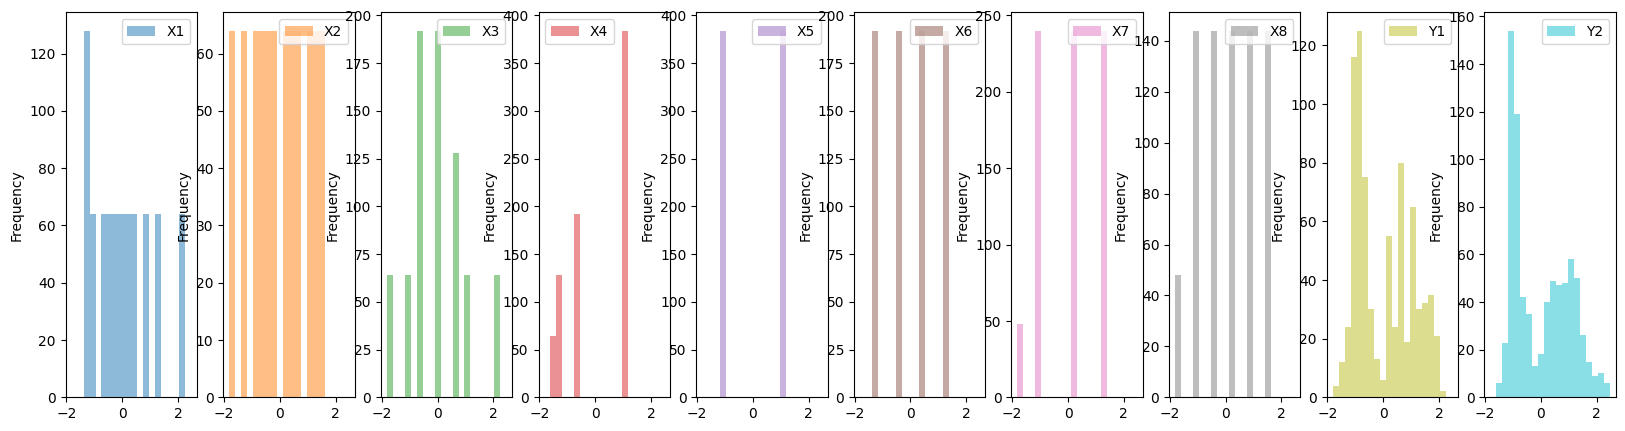

In [44]:
df.plot.hist(alpha=0.5, bins=20, subplots=True, layout=(1,10), figsize=(20,5))
plt.show()

Finding Correlation between features

In [50]:
corr_df = df.corr().round(6)
corr_df